In [5]:

import json
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [10]:
FILE = Path("out2_translated.jsonl")

rows = []
with FILE.open(encoding="utf-8") as f:
    for ln in f:
        ln = ln.strip()
        if ln:
            rows.append(json.loads(ln))

df = pd.DataFrame(rows)
print(f"✔️  Registros cargados: {len(df):,}")

# ---------------------------------------------------------------------
# 2. Calcular longitudes en palabras
# ---------------------------------------------------------------------
df["problem_word_count"]  = df["problem"].str.split().str.len()
df["solution_word_count"] = df["generated_solution"].str.split().str.len()


✔️  Registros cargados: 9,439


C:\Users\david\AppData\Local\Temp\ipykernel_25788\1966207509.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


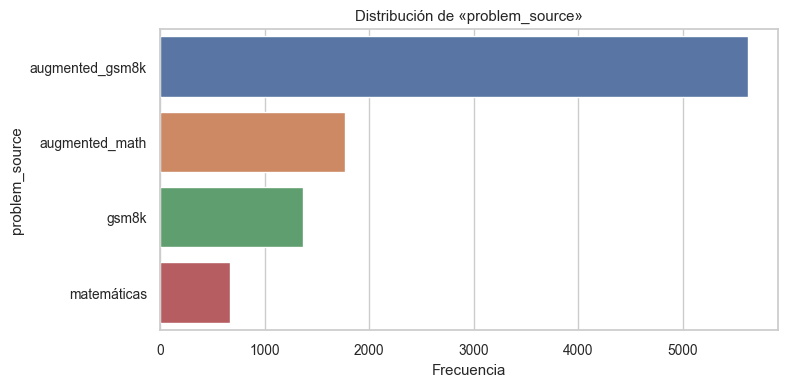

C:\Users\david\AppData\Local\Temp\ipykernel_25788\1966207509.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


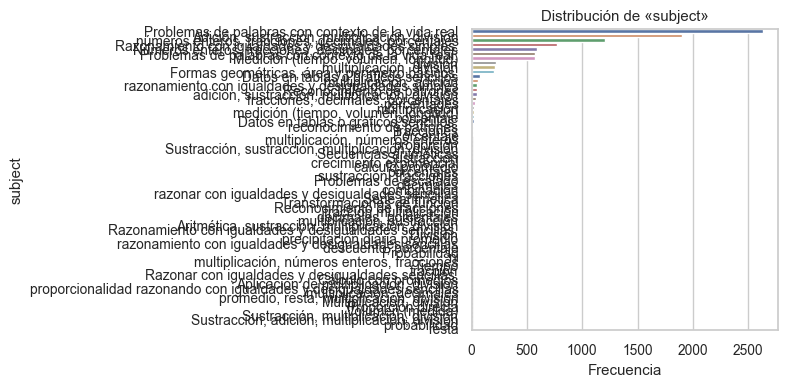

C:\Users\david\AppData\Local\Temp\ipykernel_25788\1966207509.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


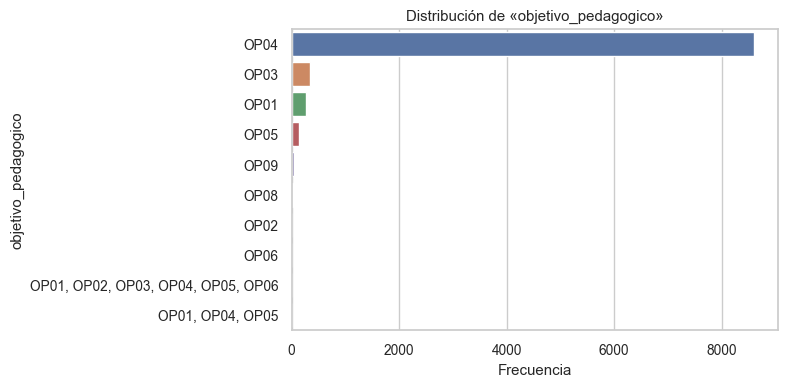

In [11]:
sns.set_theme(style="whitegrid", font_scale=0.9)

cat_cols = ["problem_source", "subject", "objetivo_pedagogico"]
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(
        data=df,
        y=col,
        order=df[col].value_counts().index,
        palette="deep"
    )
    ax.set_title(f"Distribución de «{col}»")
    ax.set_xlabel("Frecuencia")
    ax.set_ylabel(col)
    plt.tight_layout()
    plt.show()


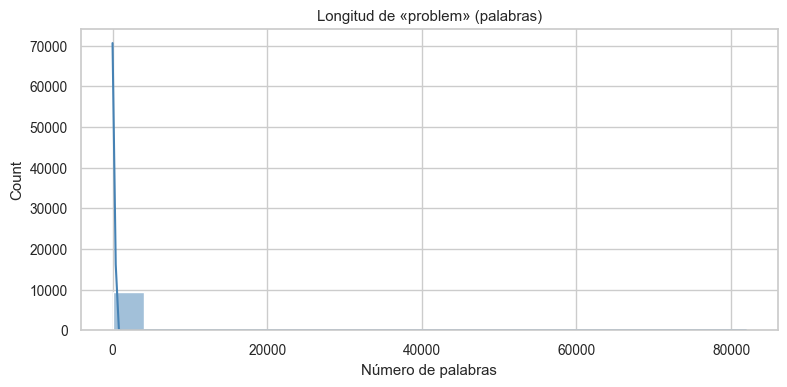

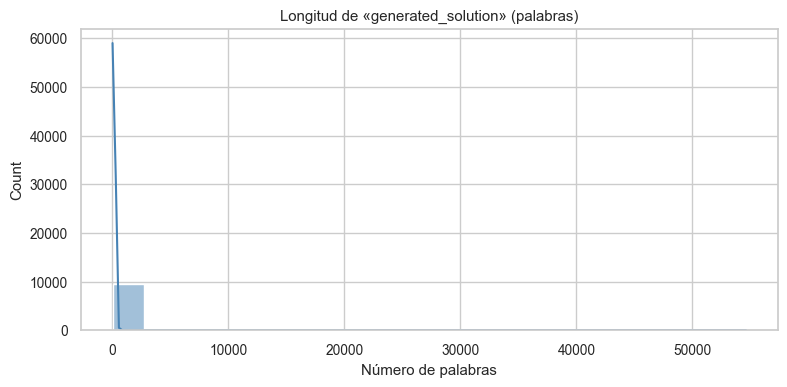

In [12]:
hist_specs = [
    ("problem_word_count",  "Longitud de «problem» (palabras)"),
    ("solution_word_count", "Longitud de «generated_solution» (palabras)")
]

for col, title in hist_specs:
    plt.figure(figsize=(8, 4))
    ax = sns.histplot(
        data=df,
        x=col,
        bins=20,
        kde=True,
        color="steelblue"
    )
    ax.set_title(title)
    ax.set_xlabel("Número de palabras")
    plt.tight_layout()
    plt.show()



In [13]:
print("\n=== Estadísticas categóricas ===")
for col in cat_cols:
    print(f"\n{col}:\n", df[col].value_counts())

print("\n=== Estadísticas de longitud ===")
print(df[["problem_word_count", "solution_word_count"]].describe())










=== Estadísticas categóricas ===

problem_source:
 problem_source
augmented_gsm8k    5626
augmented_math     1774
gsm8k              1368
matemáticas         671
Name: count, dtype: int64

subject:
 subject
Problemas de palabras con contexto de la vida real      2633
Adición, sustracción, multiplicación, división          1902
números enteros, fracciones, decimales, porcentajes     1201
Razonamiento con igualdades y desigualdades simples.     773
Números enteros, fracciones, decimales, porcentajes      587
                                                        ... 
Volumen (medida)                                           1
Sustracción, multiplicación, división                      1
Sustracción, adición, multiplicación, división             1
probabilidad                                               1
resta                                                      1
Name: count, Length: 67, dtype: int64

objetivo_pedagogico:
 objetivo_pedagogico
OP04                                  86